In [ ]:
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
ls

gdrive/  sample_data/


In [ ]:
#performing data agumentation to train data
x_train = train_datagen.flow_from_directory(
    r'/content/gdrive/MyDrive/train/TRAIN_SET',
target_size=(64, 64),batch_size=5,color_mode='rgb',class_mode='sparse')
#performing data agumentation to test data
x_test = test_datagen.flow_from_directory(
r'/content/gdrive/MyDrive/train/TEST_SET',
target_size=(64, 64), batch_size=5,color_mode='rgb',class_mode='sparse')

Found 2626 images belonging to 1 classes.
Found 10 images belonging to 5 classes.


In [ ]:
print(x_train.class_indices) #checking the number of classes

{'TRAIN_SET': 0}


In [ ]:
print(x_test.class_indices)#checking the number of classes

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [ ]:
from collections import Counter as c
c(x_train .labels)

Counter({0: 2626})

In [ ]:
import numpy as np#used for numerical analysis
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A layer consists of a tensor-in tensor-out computation function
#Dense layer is the regular deeply connected neural network layer
from tensorflow.keras.layers import Dense,Flatten
#Faltten-used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout #Convolutional layer
#MaxPooling2D-for downsampling the image
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
model=Sequential()

In [ ]:
# Initializing the CNN
classifier = Sequential()

# First convolution layer and pooling
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolution layer and pooling
classifier.add(Conv2D(32, (3, 3), activation='relu'))

# input_shape is going to be the pooled feature maps from the previous convolution layer
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
classifier.add(Flatten())

# Adding a fully connected layer
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=5, activation='softmax')) # softmax for more than 2



In [ ]:
classifier.summary()#summary of our model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)              

In [ ]:
# Compiling the CNN
# categorical_crossentropy for more than 2
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

In [ ]:
classifier.fit_generator(
        generator=x_train,steps_per_epoch = len(x_train),
        epochs=1, validation_data=x_test,validation_steps = len(x_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


526/526 [==============================] - 354s 672ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 111.5674 - val_accuracy: 0.0000e+00


In [ ]:
classifier.save('AI Nutrition Analyzer')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

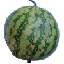

In [ ]:
img = image.load_img("/content/gdrive/MyDrive/train/TRAIN_SET/TRAIN_SET/WATERMELON/100_100.jpg",target_size= (64,64))#loading of the image
img

In [ ]:
x=image.img_to_array(img)#conversion image into array


In [ ]:
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [ ]:
x.ndim

3

In [ ]:
x=np.expand_dims(x,axis=0) #expand the dimension

In [ ]:
x.ndim

4

In [ ]:
pred = classifier.predict(x)

1/1 [==============================] - 0s 96ms/step


In [ ]:
pred

In [ ]:
labels=['APPLES', 'BANANA', 'ORANGE','PINEAPPLE','WATERMELON']
labels[np.argmax(pred)]


'APPLES'